# 恒星の明るさの測定（光度曲線の作成）

[第6回](https://github.com/kemasuda/physics_seminar_2025/blob/main/lecture6_transit/lecture6-1_transit.ipynb)では、Kepler探査機 により得られた恒星 KOI-2 の明るさの時間変化（光度曲線）データに含まれるトランジット惑星の存在を確認した。ここでは、Keplerが観測した恒星の画像データから、光度曲線を自分で作成してみよう。ここで行うのは、[開口測光（aperture photometry）](https://astro-dic.jp/aperture-photometry/)という操作を最も簡略化したものである。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## データの読み込みと画像の表示

恒星KOI-2の画像データを読み込む。画像データは2次元なので今までとは少し異なるフォーマットで用意した。

In [2]:
d = np.load("koi2_tpf.npz")

d["time"] には測定時刻のデータが numpy.ndarray で入っている。

In [3]:
d["time"]

array([352.37711479, 352.39754779, 352.4384138 , ..., 442.16210673,
       442.18254082, 442.20297481])

d["image"]が画像データである。

In [4]:
d["image"]

array([[[        nan,         nan,  68.48964  , ...,         nan,
                 nan,         nan],
        [        nan,         nan, 203.20557  , ...,         nan,
                 nan,         nan],
        [        nan,  36.401005 ,  39.62072  , ...,  11.767744 ,
           7.387267 ,         nan],
        ...,
        [        nan,  46.72748  ,  26.74423  , ...,  62.828316 ,
          42.87843  ,         nan],
        [        nan,         nan,   8.897776 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,   5.0643334, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,  67.35474  , ...,         nan,
                 nan,         nan],
        [        nan,         nan, 204.98846  , ...,         nan,
                 nan,         nan],
        [        nan,  34.119488 ,  41.978508 , ...,  11.383803 ,
           7.3454456,         nan],
        ...,
        [        nan,  45.8379   ,  26.311935 , ...,  

なにやらたくさんの値が出る。まずこれらのデータの形を確認してみよう。numpy.shape()を使う。

In [5]:
np.shape(d["time"])

(4116,)

In [6]:
np.shape(d["image"])

(4116, 15, 11)

d["time"] は長さ4116の配列、d["image"] は4116 x 15 x 11の3次元配列（行列と思ってもよい）である。4116が共通なことからわかるように、d["image"] の一つ目の添字（index）は時刻に対応している。つまり、d["image"][0] が最初の測定画像、d["image"][1] が2番目の測定画像...　という具合である。indexは0から始まることに注意。

d["image"][0] を見てみよう。4116 x 15 x 11の一つ目の添字について0番目を取り出すので、これは15 x 11の2次元配列になっている。

In [7]:
d["image"][0]

array([[           nan,            nan, 6.84896393e+01, 2.52548580e+01,
        1.39544258e+01, 9.62553120e+00,            nan,            nan,
                   nan,            nan,            nan],
       [           nan,            nan, 2.03205566e+02, 2.77976952e+01,
        3.24893837e+01, 1.54363928e+01, 2.95645237e+00,            nan,
                   nan,            nan,            nan],
       [           nan, 3.64010048e+01, 3.96207199e+01, 3.30035439e+01,
        5.48139954e+01, 3.54633179e+01, 1.21497612e+01, 1.02952290e+01,
        1.17677441e+01, 7.38726711e+00,            nan],
       [2.11501827e+01, 2.68454361e+01, 3.10748940e+01, 1.81144119e+02,
        1.93985916e+02, 9.42151337e+01, 3.39987335e+01, 2.20806732e+01,
        1.43292665e+01, 1.59271049e+01, 2.58817635e+01],
       [1.33218460e+01, 3.75978622e+01, 1.44810013e+02, 9.35996155e+02,
        4.25326874e+02, 2.22402100e+02, 1.35811371e+02, 6.22073174e+01,
        6.21164284e+01, 4.88704071e+01, 2.69614391e+

これは画像データを表している。15x11は画像のピクセルであり、数値は各ピクセルの明るさ（単位時間あたりの光のエネルギー量を、電流に換算して表したもの; 単位は電子数/秒）を表している。画像っぽく表示するには、matplotlib.pyplot.imshow() 関数を用いて以下のようにする。引数の cmap では[カラーマップ](https://matplotlib.org/stable/tutorials/colors/colormaps.html) の種類を選んでいる。

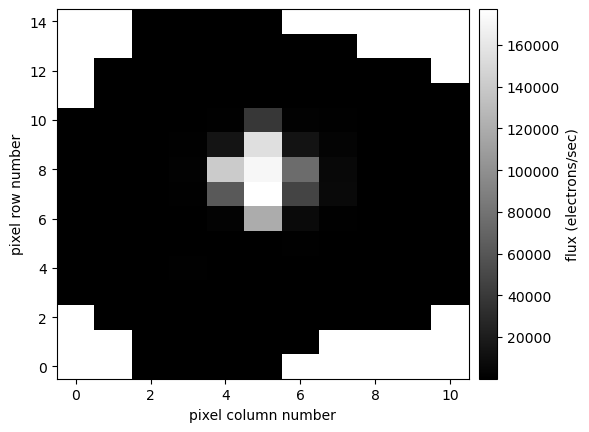

In [8]:
plt.imshow(d["image"][0], origin='lower', cmap='gray', aspect='auto') # origin='lower'は左下を(0,0)にする
plt.colorbar(label="flux (electrons/sec)", pad=0.02) # 右にカラーバーを表示、padは間隔の調節
plt.xlabel("pixel column number") # columnは列
plt.ylabel("pixel row number");   # rowは行

右のバーが各ピクセルの光量を示す。つまり、真ん中の白いところに恒星が写っている（画像の隅の白い部分はデータがないピクセル; 以下も参照）。恒星の明るさを求めるには、全部のピクセルの光量を足せばよい。2次元の配列に対しても、この操作は numpy.sum()で実行できるのでやってみよう。

In [9]:
np.sum(d["image"][0])

nan

数値ではなくnanになってしまった。これは、元のデータd["image"][0]に欠損値 [NaN (Not a Number)](https://ja.wikipedia.org/wiki/NaN) が含まれていたためである。上で見たd["image"][0]の中身には確かにnanが入っている。plt.imshow()で表示した画像の隅の白い部分はこのためである。

この問題の解決方法はいくつかありうるが、一つの簡単な方法は [numpy.nansum](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html)　関数を使うことである。nansum は sum と異なり、NaNを無視した和を返す。

In [10]:
np.nansum(d["image"][0])

1061704.8

これで画像中の光量の和（今の場合恒星は一つしか写っていないので、恒星の明るさ）が得られた。d["image"][0]についてやっているので、これは0番目のデータ（時刻d["time"][0]に対応）の値である。

## 課題1

1. 同様な操作を全てのデータについて行い、各測定時刻における恒星の明るさの配列 flux を作成せよ。fluxはd["time"]と同じ長さになる。

2. 得られたfluxをd["time"]に対してプロットし、惑星のトランジットの存在を確認せよ。惑星の公転周期はおおよそ何日か？

**1のヒント**: [for文](https://utokyo-ipp.github.io/3/3-2.html)を使うとよい。例えば、$i=0,1,2,...,9$に対して、$2i+1$からなる配列 odd_numbers は以下のように作れる。

In [11]:
odd_numbers = []
for i in range(10):
    odd_numbers.append(2*i+1)

In [12]:
odd_numbers

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [13]:
# データの各時刻において明るさを計算し、時刻と明るさの配列を返す関数を定義
def get_lc(d):
    t = np.array(d["time"])
    flux = []
    for i in range(len(t)):
        flux.append(np.nansum(d["image"][i]))
    return t, np.array(flux)

In [14]:
t, f = get_lc(d)

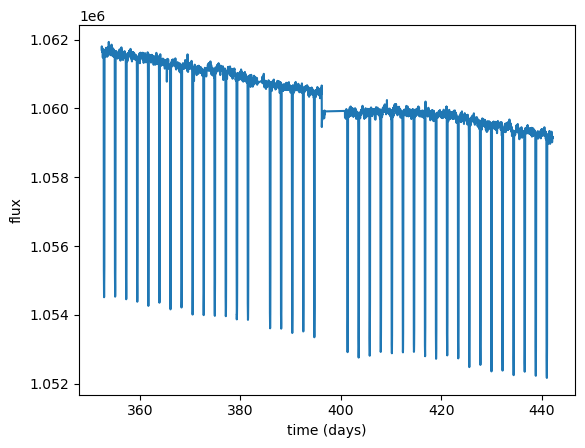

In [16]:
plt.xlabel("time (days)")
plt.ylabel("flux")
plt.plot(t, f);

fluxが下がっているところがトランジットである。適当に拡大してみよう。

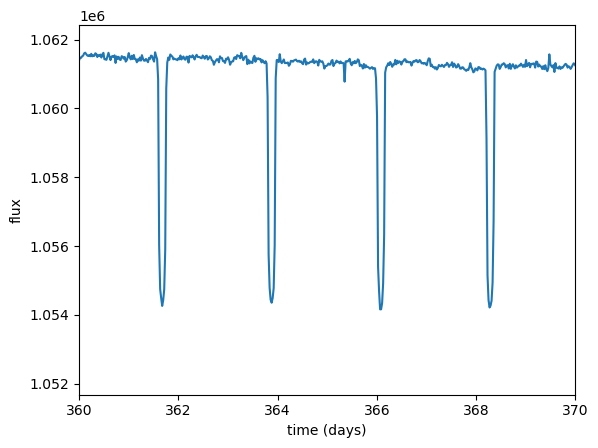

In [22]:
plt.xlabel("time (days)")
plt.ylabel("flux")
plt.plot(t, f)
plt.xlim(360, 370);

トランジットの間隔はおおよそ2.2日である。これが惑星の公転周期に対応する。

## 課題2

1. kepler-51_tpf.npz には別の恒星 Kepler-51 の同様なデータが入っている。これについても光度曲線を作ってプロットしてみよう。

2. プロットの範囲を変えるなどして、このデータに含まれるトランジット惑星（一つとは限らない）をできるだけ探してみよう。またトランジットとは異なる要因での明るさの変動が見えるはずだがこれは何か？　考えを述べよ。

In [23]:
t, f = get_lc(np.load("kepler-51_tpf.npz"))

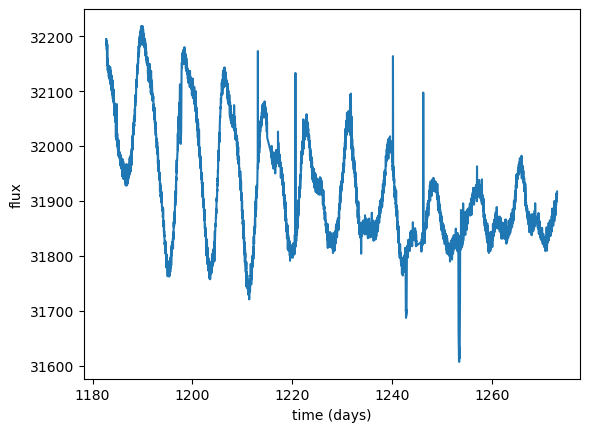

In [25]:
plt.xlabel("time (days)")
plt.ylabel("flux")
plt.plot(t, f);

時刻1240以降にフラックスが下がっている部分があるので拡大すると、2つの減光（トランジット）が見える。

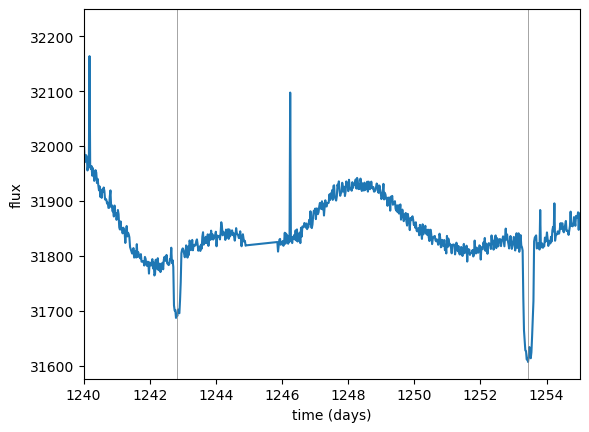

In [37]:
plt.xlabel("time (days)")
plt.ylabel("flux")
plt.plot(t, f)
plt.xlim(1240, 1255)
plt.axvline(x=1242.83, color='gray', lw=0.5)
plt.axvline(x=1253.45, color='gray', lw=0.5);

減光の深さが異なるので、これらは大きさが異なる別々の惑星のトランジットであることがわかる。つまりこの恒星は複数の惑星を有している。

実はこのデータ中には、もう一つさらに別の惑星のトランジットも見えている。

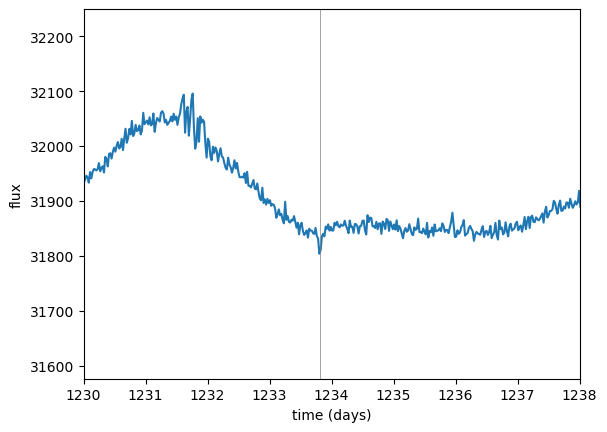

In [35]:
plt.xlabel("time (days)")
plt.ylabel("flux")
plt.plot(t, f)
plt.xlim(1230, 1238)
plt.axvline(x=1233.80785, color='gray', lw=0.5);

このトランジットについてはこのデータだけから惑星であると確信することは難しいが、ここで示したのとは別の時期に得られたデータにも同様な減光が周期的に観測されていることから惑星であることが確認されている。

トランジット以外にも、8日程度の周期で明るさが変動している。これは恒星の表面に存在する黒点（lecture6.pdf, p48など）が、自転に伴って見え隠れすることによるものと考えられている。
つまり、この変光の周期は恒星の自転周期に対応している。